In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import *

The RC circuit in the homework has impedance $Z(\omega)=\sqrt{R^2+\frac{1}{\omega^2C^2}}e^{i\Delta}$, 
where $\Delta(\omega)=\arctan(-\frac{1}{\omega RC})$. In what follows, we will set R=C=1. You can think of this as 
measuring frequencies in units of $1/RC$, and instead of thinking about $Z$, we are considering $Z/R$ to set the scale.
Below is a plot of the magnitdue of the admittance $Z(\omega)^{-1}$ to remind you that the voltage across the resistor 
(one of the possible output voltages)  works as a __high pass filter__, meaning that low frequencies are filtered. 
Physically, this occurs because the capacitor charges during the input cycle, and so no current flows

Text(0, 1, '$|Z(\\omega)|^{-1}$')

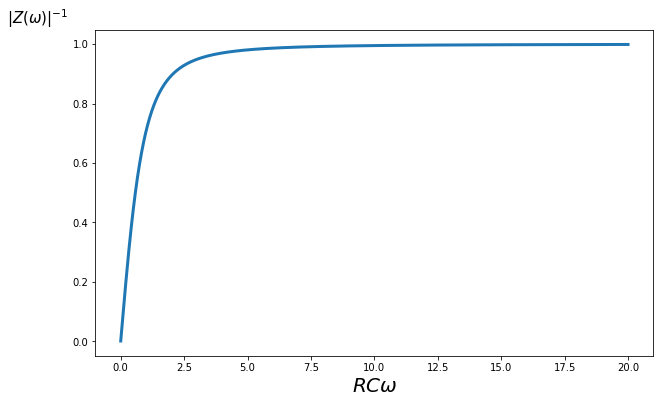

In [2]:
w=np.linspace(0.001,20,1000)
def Z1(x):
    return np.sqrt(1.0+1.0/x**2)
def D1(x):
    return -np.arctan(1.0/x)
plt.figure(figsize=(10,6))
plt.plot(w,1.0/Z1(w),linewidth=3.0)
plt.xlabel(r'$RC\omega$',fontsize=20)
plt.ylabel(r'$|Z(\omega)|^{-1}$',rotation=0,fontsize=15,loc='top')

Reminder on the meaning of the impedance: the complex current and voltage are related by $V(t)=Z(\omega)I(t)$.
This means that if you have an external emf source that varies as $\varepsilon(t)=\varepsilon_0\cos(\omega t)$, the current
response of the circuit is $I(t)=\frac{\varepsilon_0}{|Z(\omega)|}\cos(\omega t-\Delta(\omega))$. This is the real part of 
the complex $I(t)=\frac{V_{out}(t)}{Z}=\frac{\varepsilon_0e^{i\omega t}}{|Z|e^{i\Delta}}=\frac{\varepsilon_0}{|Z|}e^{i(\omega t-\Delta)}$

Since this circuit has a capacitor, we can also define an "impedance" that gives us the __charge response__ in the
circuit, i.e the voltage across the capacitor. Physically, we would expect the voltage across the capacitor to behave like
a __low pass filter__: low frequency signals are slow and charge the capacitor (leading to a higher voltage, 
so low impedance), and fast signals don't charge the capacitor, so the output voltage would be small (high impedance). 
The "impedance" in this case would be, $Z_2(\omega)=\sqrt{1/C^2+\omega^2 R^2}e^{i\Delta_2}$, with 
$\Delta_2(\omega)=\arctan(\omega RC)$. The magnitude  of the admittance, once again, is plotted below. The meaning of this 
impedance  is similar to the one for the resistor:  $V_{out}(t)=Z_2(\omega)Q(t)$. Note that this implies the real charge 
in the  capacitor behaves as $Q(t)=\frac{\varepsilon_0}{|Z_2|}\cos(\omega t-\Delta_2(\omega))$

Text(0, 1, '$|Z(\\omega)|^{-1}$')

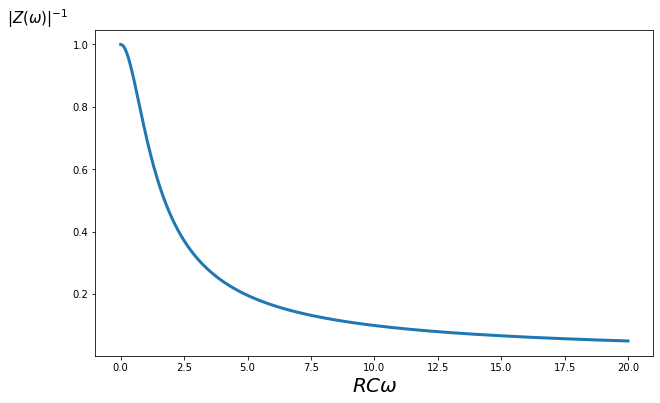

In [3]:
w2=np.linspace(0,20,1000)
def Z2(x):
    return np.sqrt(1.0+x**2)
def D2(x):
    return np.arctan(x)
plt.figure(figsize=(10,6))
plt.plot(w,1.0/Z2(w),linewidth=3.0)
plt.xlabel(r'$RC\omega$',fontsize=20)
plt.ylabel(r'$|Z(\omega)|^{-1}$',rotation=0,fontsize=15,loc='top')

Physically, the impedance tells us how the various aspects of the circuit (current, charge) respond to a particular output
voltage. Mathematically, the impedance is useful because the differential equation which determines the time evolution
of the charge $Q(t)$ is linear: $\frac{Q(t)}{C}+R\frac{dQ}{dt}=V_{in}(t)$. This means that if our voltage source corresponds
of a sum of many different inputs (think sources in series with one another), then we can find solutions $Q(t)$ for each
source separately and add them up to find the total response.

Proof: consider a source $V_{in}=\sum V_{in,i}(t)$. Now 
assume we know the solutions $Q_i(t)$ for the circuit when only one of the sources is acting, namely we have solved the
differential equation $\frac{Q_i}{C}+R\dot{Q_i}=V_{in,i}(t)$. When all the voltage sources act together, then $Q(t)$ should
satisfy the differential equation $\frac{Q}{C}+R\dot{Q}=\sum V_{in,i}(t)$. Let's verify that $\sum Q_i$ satisfies this
differential equation by plugging it into the ODE.

\begin{gather*}
\frac{1}{C}\sum Q_i + R\sum Q_i = \sum \left(\frac{Q_i}{C}+R\dot{Q_i}\right) = \sum V_{in,i}(t)
\end{gather*}


The mathematical fact that we will now explore is the following. Any periodic driving voltage $V(t)$ with period P can
be decomposed in a Fourier series $V(t)= \frac{a_0}{2}+ \sum {a_n}\cos(\frac{2\pi n}{P} t) + 
\sum b_n\sin(\frac{2\pi n}{P}t)$. Non-periodic impulses can be decomposed in terms of a fourier transform:
$V(t)=\text{Re}\left(\int f(\omega)e^{i\omega t}d\omega\right)$.

Using the linearity of the differential equation, the impedance gives us the solution for the circuit's response right away!
Convince yourself (using the previously stated fact that we can add solutions) that the current response should be
\begin{gather*}
I(t) = \frac{a_0}{2|Z(0)|}\cos(\Delta (0)) + \sum \frac{a_n}{|Z\left(\frac{2\pi n}{P}\right)|}
\cos\left(\frac{2\pi n}{P}t-\Delta\left(\frac{2\pi n}{P}\right)\right)
+ \sum \frac{b_n}{|Z\left(\frac{2\pi n}{P}\right)|}
\sin\left(\frac{2\pi n}{P}t-\Delta\left(\frac{2\pi n}{P}\right)\right)
\end{gather*}

We will drive our circuit with a square wave. The square wave is an odd function and it is periodic, so we can use a Fourier
series which consists only of sines! The coefficients for the square wave sine series are, up to a normalization factor,
$b_n=\frac{1-(-1)^n}{n}$, which equals $2/n$ for $n$ odd and is zero for all even $n$. That will simplify our solution
considerably! Below is a plot of a square wave along with the first N terms of its Fourier sine series. You can drag the
N slider to see how the sum changes as we add more terms. The period P of the square wave is set to 2.

<IPython.core.display.Javascript object>


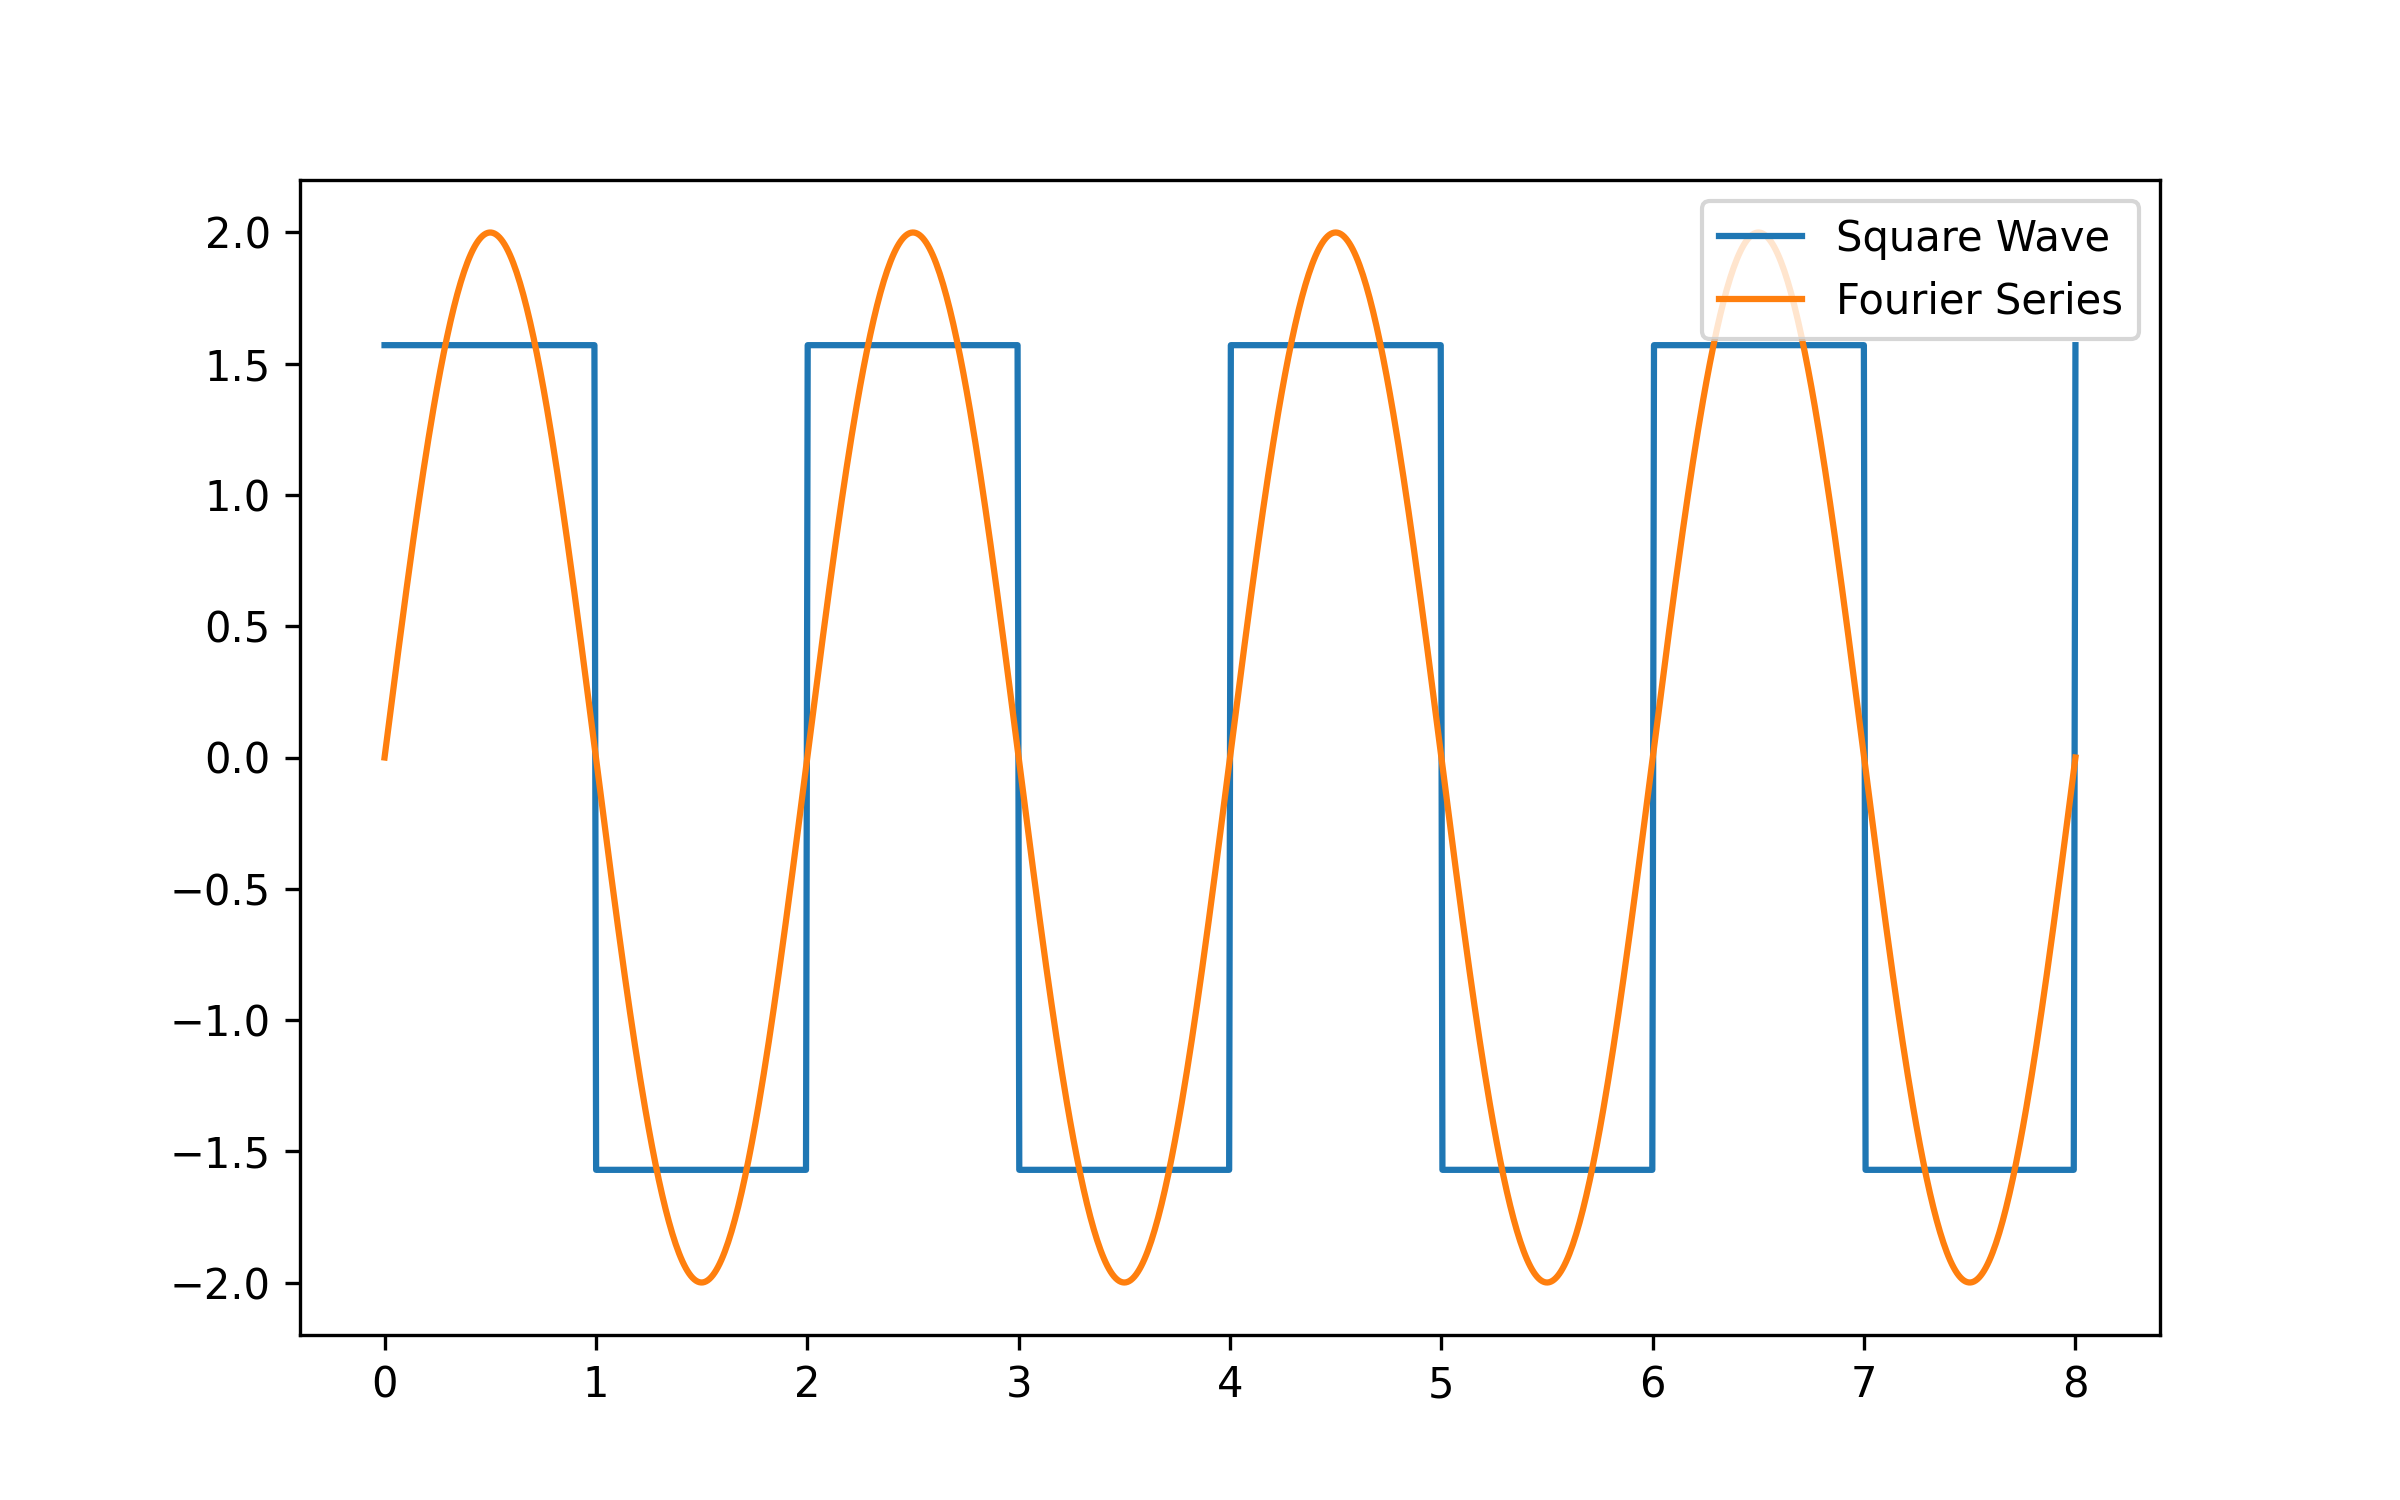

Widget Javascript not detected.  It may not be installed or enabled properly.


In [4]:
%matplotlib widget
t=np.linspace(0,8,1000) #t axis
P=2.0 #period

square_wave = np.array([(np.pi/2) if math.floor(x/(P/2.0)) % 2 == 0 else -(np.pi)/2 for x in t]) #square wave

def a(n): #fourier coefficients for the square wave. change for different functions!
    return (1.0-(-1.0)**n)/n

def fourier_square(tt,NN):
    series=np.zeros(len(tt))
    for i in range(len(tt)):
        for j in range(1,NN+1):
            series[i]+=a(j)*np.sin(2.0*np.pi*j*tt[i]/P)
    return series

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,square_wave,label='Square Wave')
line, = ax.plot(t, fourier_square(t,1),label='Fourier Series')
ax.legend(loc='upper right')

def updatefsq(Nt = 1):
    line.set_ydata(fourier_square(t,Nt))
    fig.canvas.draw_idle()

#interact(update);
interact(updatefsq, Nt=widgets.IntSlider(min=1, max=100, step=1, value=1));

There's a lot of important physics in this! Note, first of all, that the N=1 term has the same period as the square wave.
It looks pretty similar to the square wave already, so we can think of it as setting the general shape of the function,
and the higher frequencies are required to "fill in the details". What does this mean? Remember that period = 1/frequency,
so the general relationship between each of the frequency components is that each frequency is responsible, roughly 
speaking, for providing the features of the function that appear on a timescale of 1/frequency. Thus, high frequencies
are the ones responsible for the fine details in the function. A jump discontinuity happens instantaneously (so it has
infinite frequency), and that's why you need many terms to get the jump right! Any features of your function that have to do
with long time scales will be provided by the lower frequencies in the series expansion. In particular, if you zoom out
the function infinitely, so you only see it's average value, that will correspond to the zero frequency term $a_0$.

Side note: you might have noticed that the Fourier series never seems to get the jump __exactly__ right. This is because our
"input", the square wave, has a jump discontinuity. Although the Fourier series __rigorously__ converges to the square wave 
when you add up all of the terms, any finite sum will overshoot the jump by a little bit. This is known as the Gibbs phenomenon
of Fourier series and is an unfortunate fact of life we have to deal with, but it doesn't make Fourier series any less useful.

Now we're ready to put the square wave through our circuit! In the next two cells, we'll show you how the capacitor and the resistor respond to the square wave input. Before dragging the sliders to see their response emerge, use the physics to try and make a prediction. How should the capacitor behave? What about the resistor? Use what you know about the frequency response of each of these circuit elements and the above discussion on the roles of the different frequencies

<IPython.core.display.Javascript object>


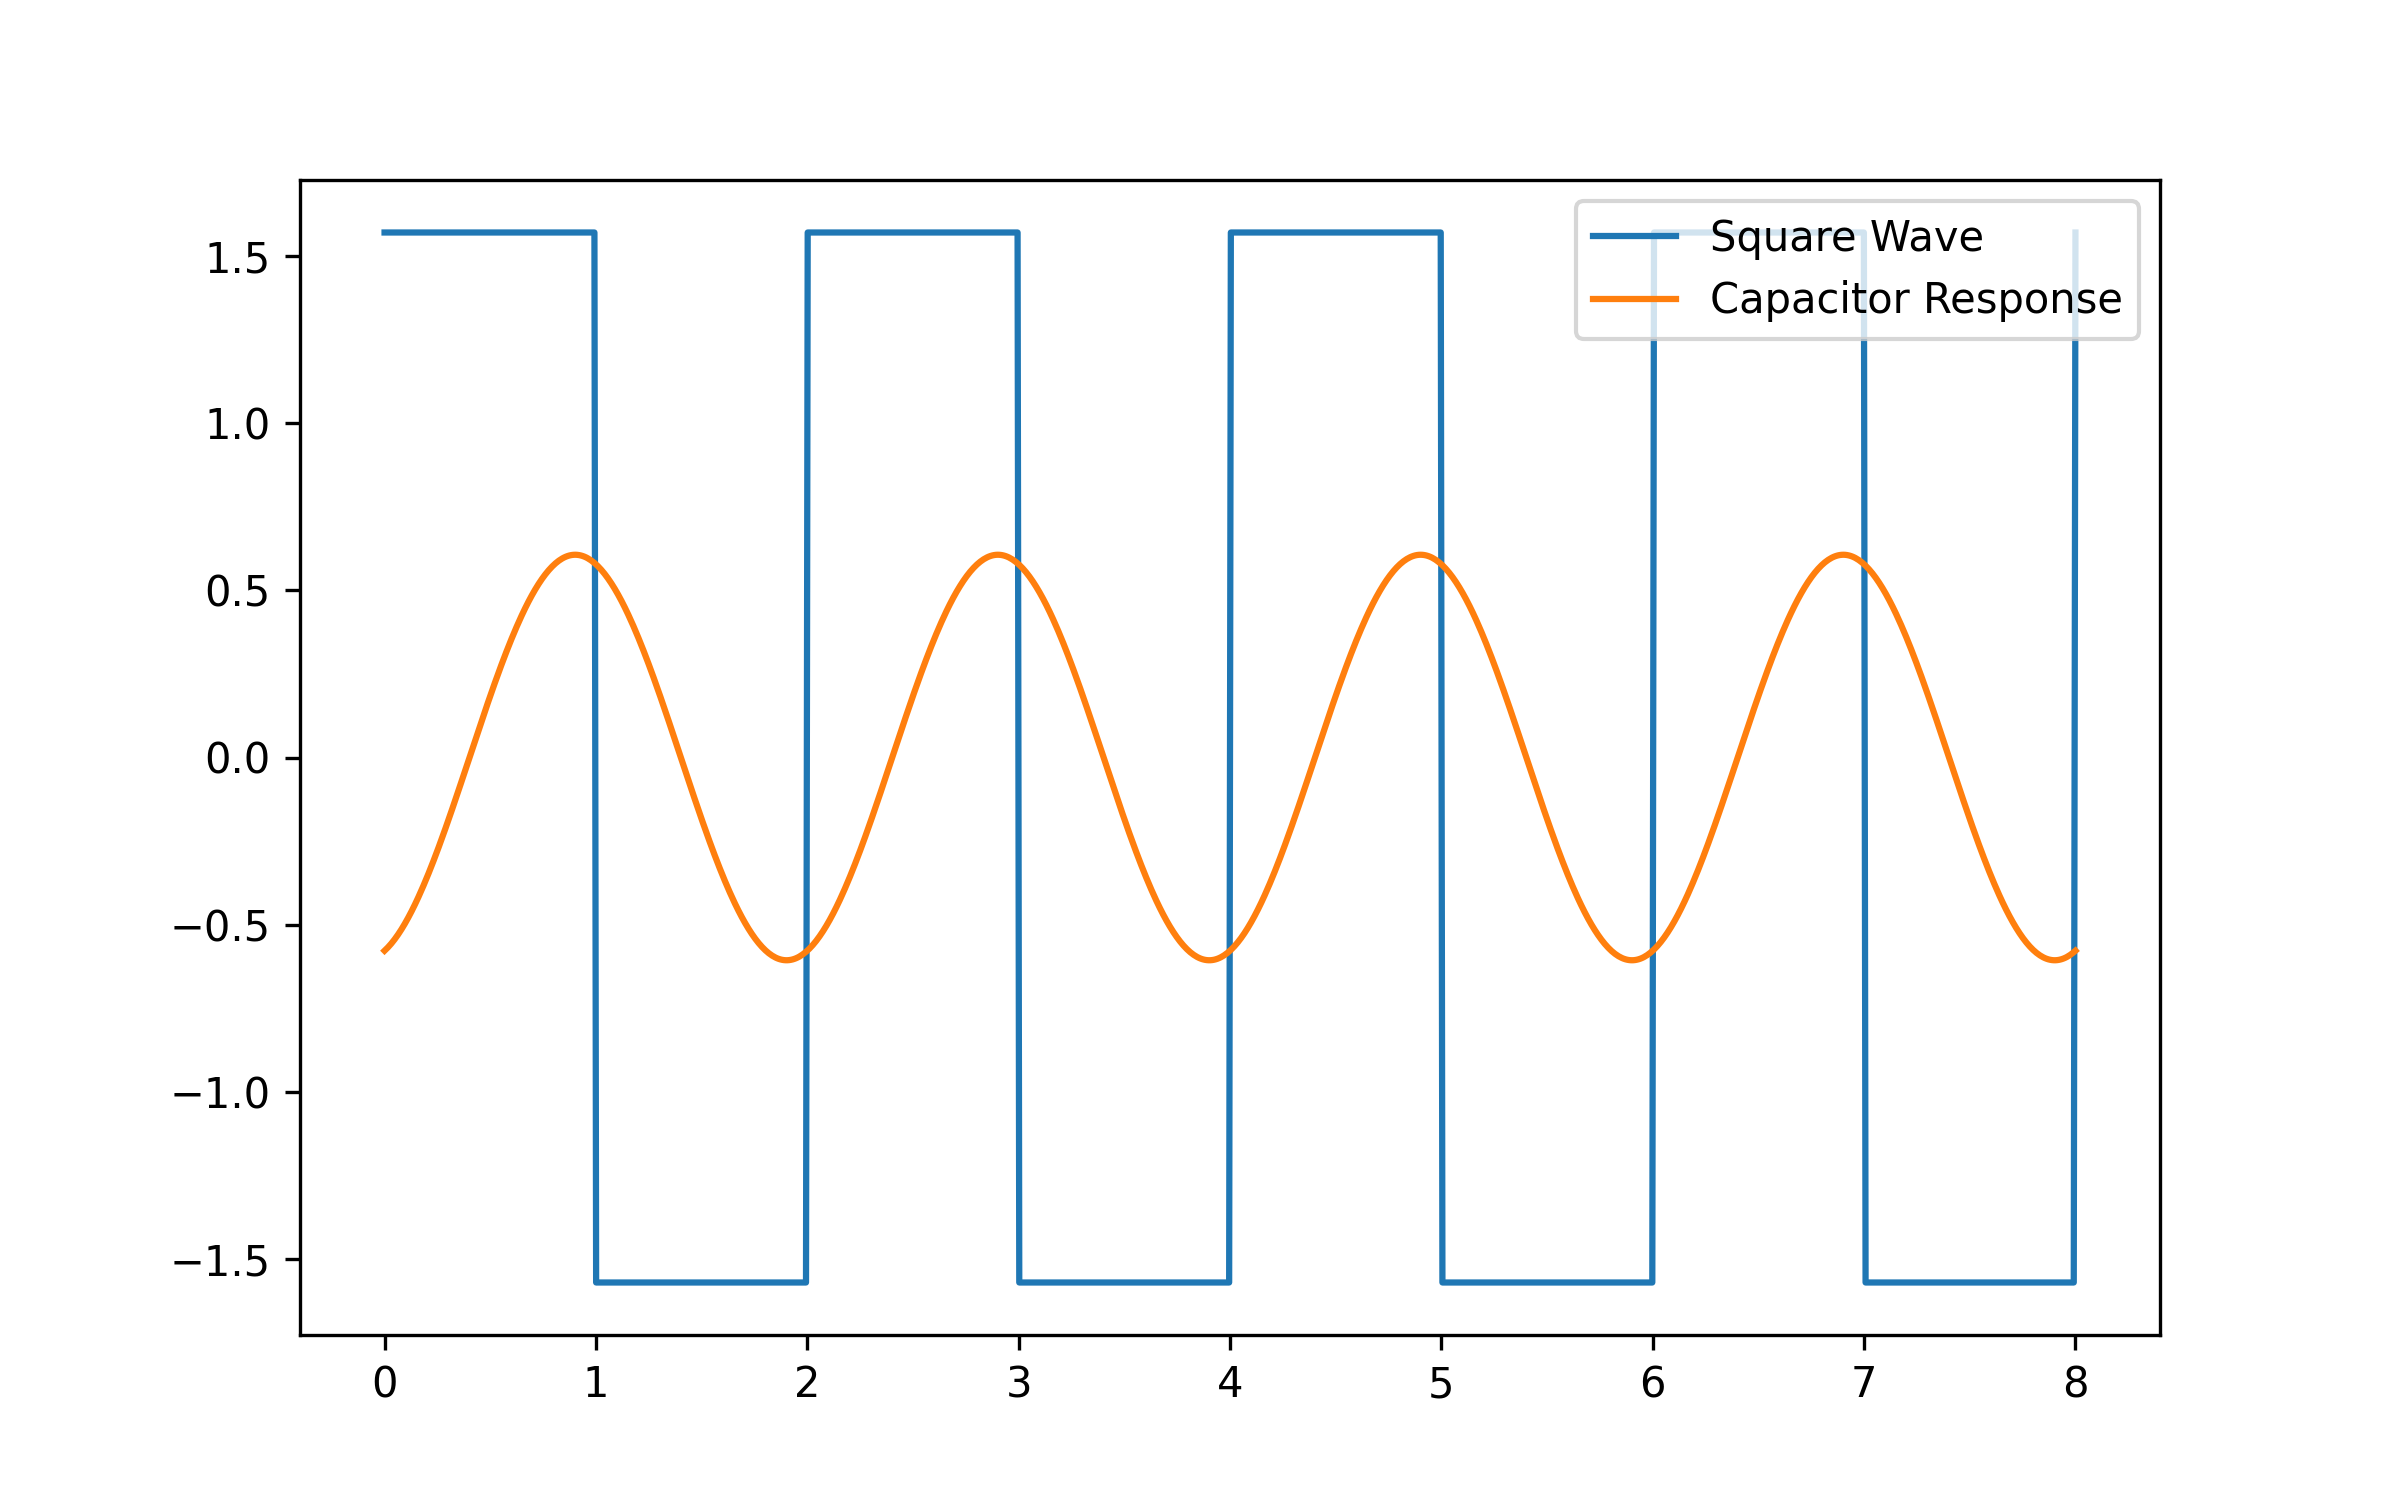

Widget Javascript not detected.  It may not be installed or enabled properly.


In [5]:
def fourier_capacitor(tt,NN):
    series=np.zeros(len(tt))
    for i in range(len(tt)):
        for j in range(1,NN+1):
            omegaj=2.0*np.pi*j/P
            series[i]+=(a(j)/Z2(omegaj))*np.sin(omegaj*tt[i]-D2(omegaj))
    return series

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,square_wave,label='Square Wave')
line, = ax.plot(t, fourier_capacitor(t,1),label='Capacitor Response')
ax.legend(loc='upper right')

def updatefsc(Nt = 1):
    line.set_ydata(fourier_capacitor(t,Nt))
    fig.canvas.draw_idle()

#interact(update);
interact(updatefsc, Nt=widgets.IntSlider(min=1, max=100, step=1, value=1));

Some physics: you can see the capacitor charging and discharging! Also, note that the capcitor is a __low pass filter__. This means that it doesn't respond to high frequencies, so the mathematics tells us that any high frequencies features of the input shouldn't be as prominent in the output. In particular, since the infinite-frequency impedance is zero, you should have no infinite frequency features. We see this! The jump discontinuity in the square wave becomes a much softer slope discontinuity in the output. Now let's see the resistor's response

<IPython.core.display.Javascript object>


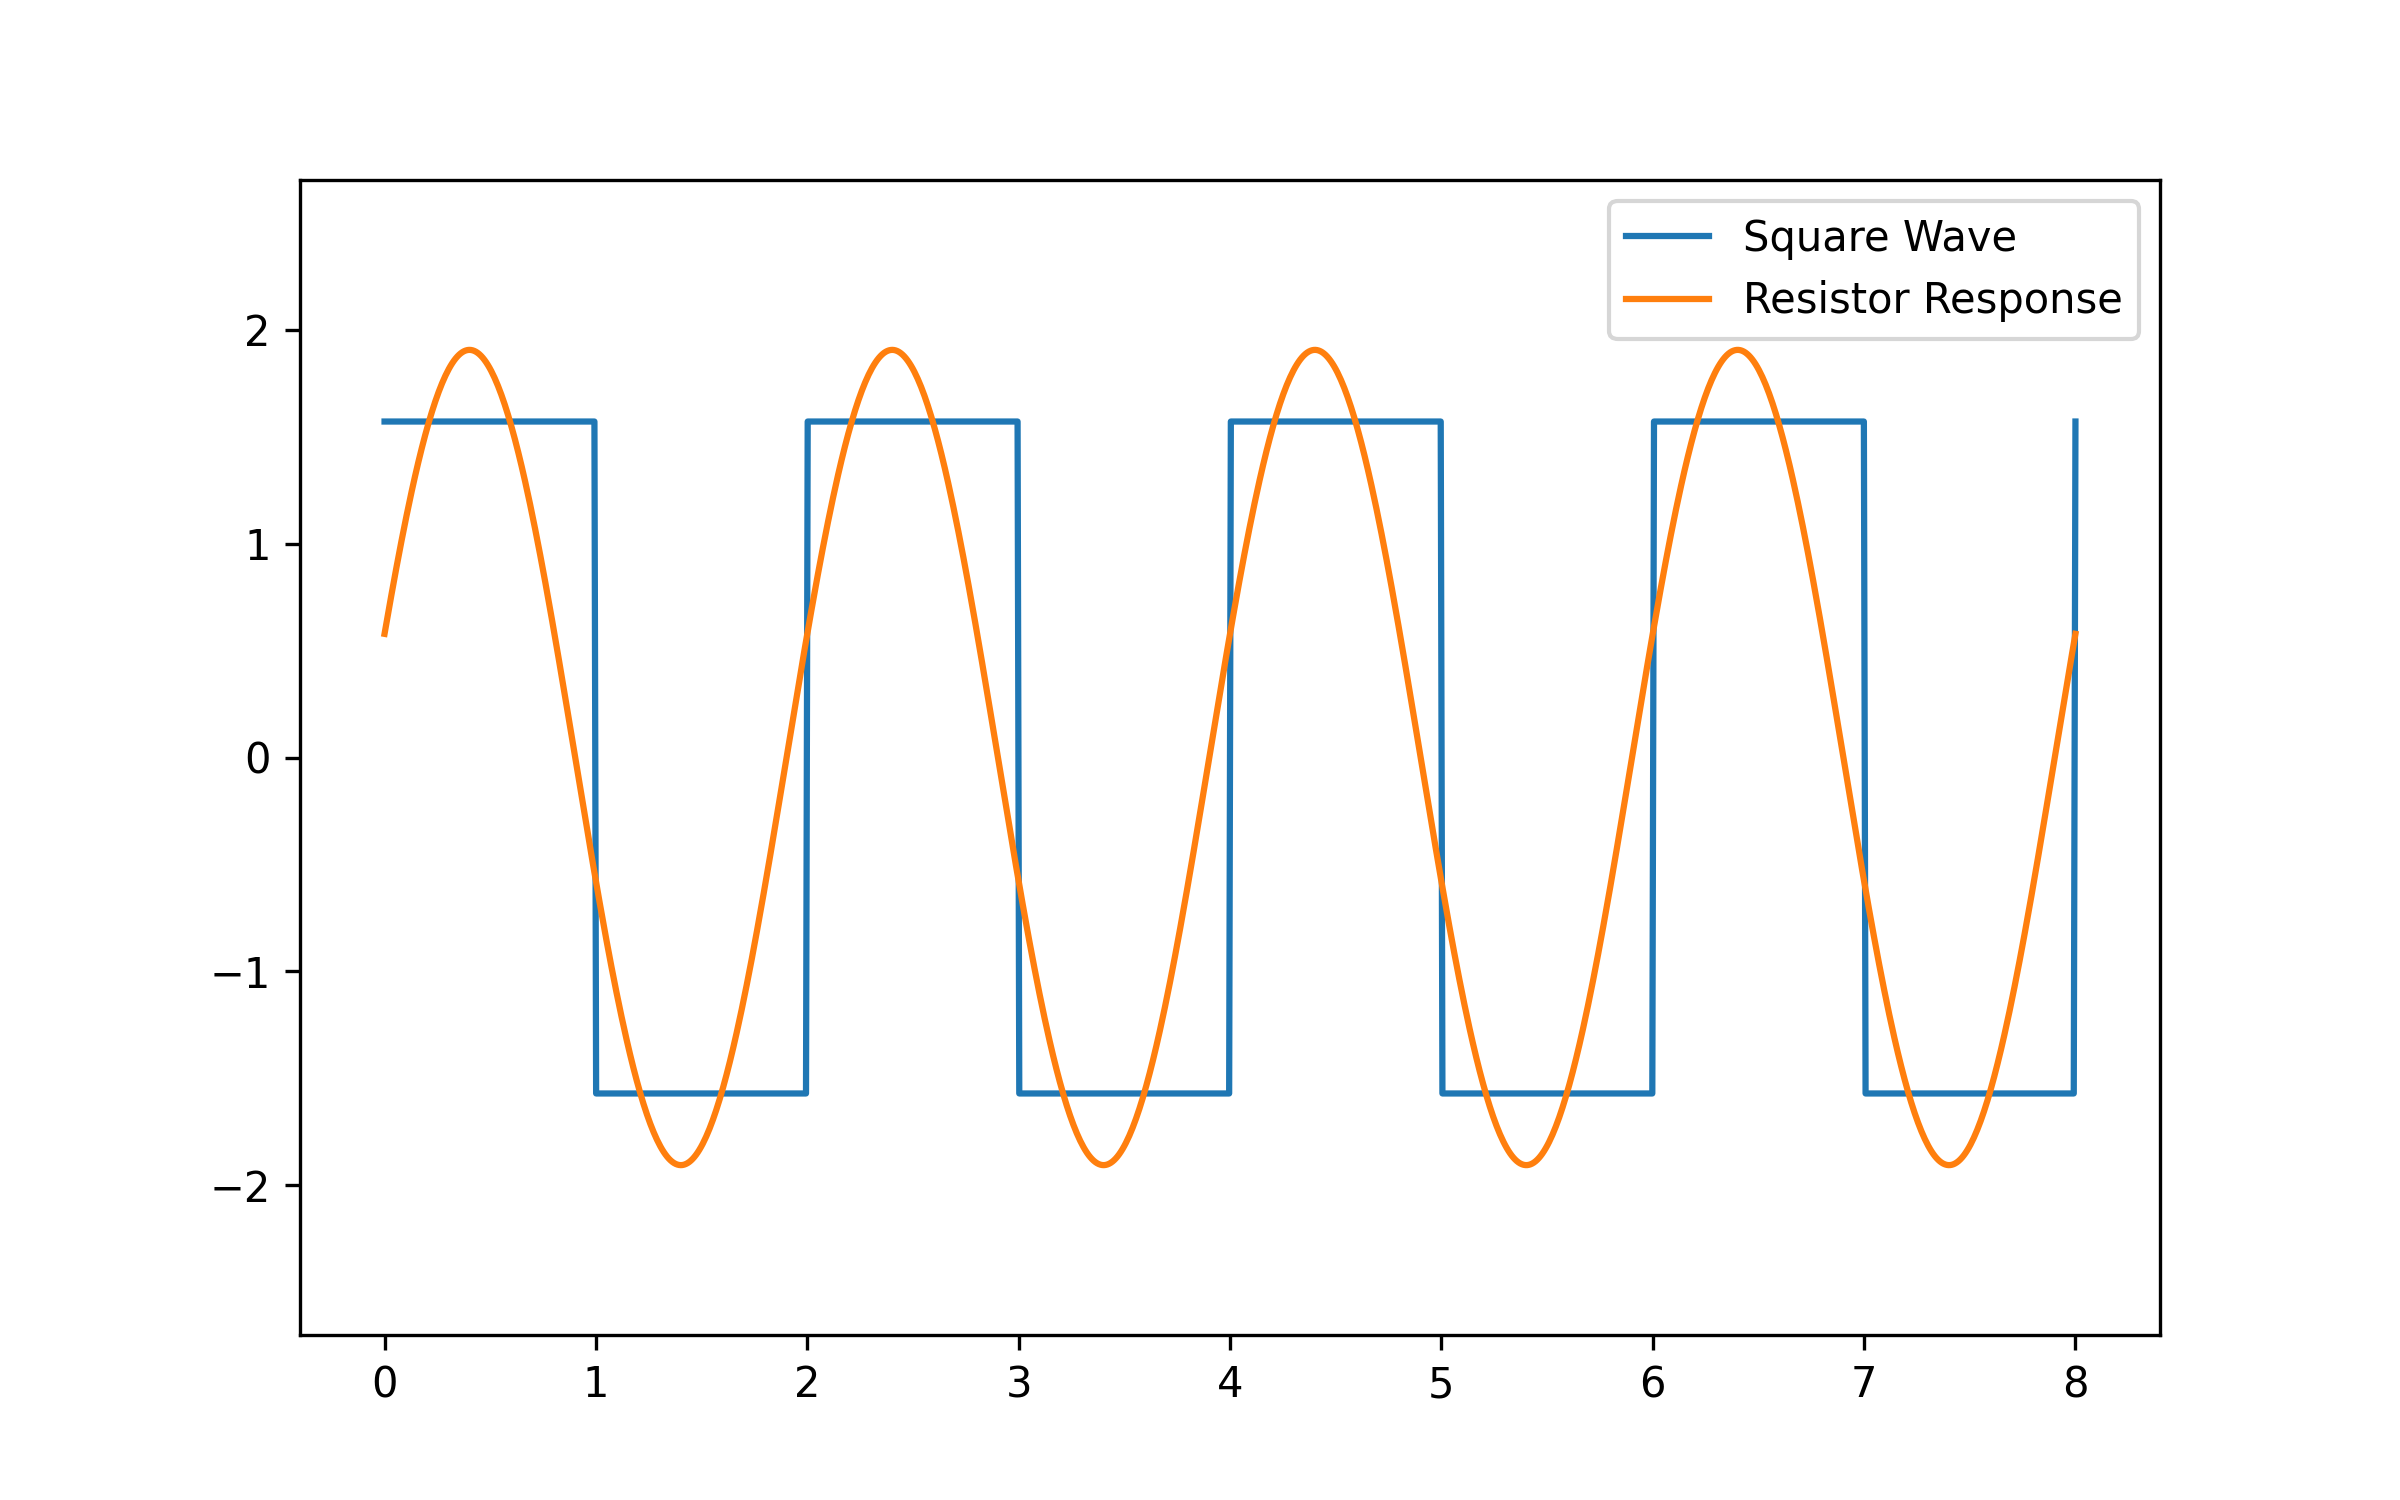

Widget Javascript not detected.  It may not be installed or enabled properly.


In [6]:
def fourier_resistor(tt,NN):
    series=np.zeros(len(tt))
    for i in range(len(tt)):
        for j in range(1,NN+1):
            omegaj=2.0*np.pi*j/P
            series[i]+=(a(j)/Z1(omegaj))*np.sin(omegaj*tt[i]-D1(omegaj))
    return series

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,square_wave,label='Square Wave')
line, = ax.plot(t, fourier_resistor(t,1),label='Resistor Response')
ax.legend(loc='upper right')
ax.set_ylim(-2.7,2.7)

def updatefsr(Nt = 1):
    line.set_ydata(fourier_resistor(t,Nt))
    fig.canvas.draw_idle()

#interact(update);
interact(updatefsr, Nt=widgets.IntSlider(min=1, max=100, step=1, value=1));

You can see the sharp jump in the current whenever the emf source is switches direction, which is expected for a resistor! Note that since high frequencies do get transmitted, you still have the sharp jumps. The high frequency transmission is also the reason why you need a lot more terms to see the series begin to approach the correct form: since higher frequencies are more important, you need more terms in the sum. The fact that the zero-frequency impedance of this circuit is infinite means that the average voltage across the resistor will *always* be zero, regardless of the average voltage provided by the source